In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## K-Means

In [8]:
from sklearn.cluster import KMeans


k_means = KMeans(n_clusters=5)
k_means.fit(X)

KMeans(n_clusters=5)

In [9]:
k_means.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [10]:
centers = k_means.cluster_centers_
centers

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

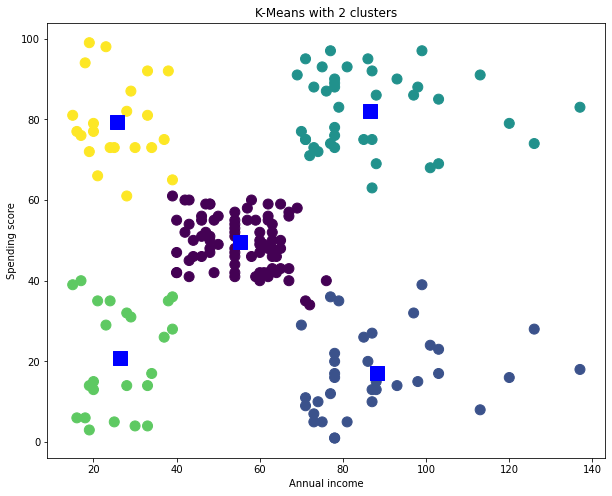

In [11]:
from turtle import color
from matplotlib import pyplot as plt


plt.figure(figsize=(10, 8))
plt.scatter(X["Annual Income (k$)"],
            X["Spending Score (1-100)"],
            c=k_means.labels_,
            s=100)

plt.scatter(centers[:,0], centers[:,1], color="b", s=200, marker="s")

plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.title("K-Means with 2 clusters")
plt.show()

## BIRCH

In [12]:
from sklearn.cluster import Birch


birch = Birch(threshold=0.01, n_clusters=5)
birch.fit(X)

Birch(n_clusters=5, threshold=0.01)

In [13]:
from numpy import unique


yhat_birch = birch.predict(X)
clusters_birch = unique(yhat_birch)
clusters_birch

array([0, 1, 2, 3, 4], dtype=int64)

In [14]:
set(birch.labels_)

{0, 1, 2, 3, 4}

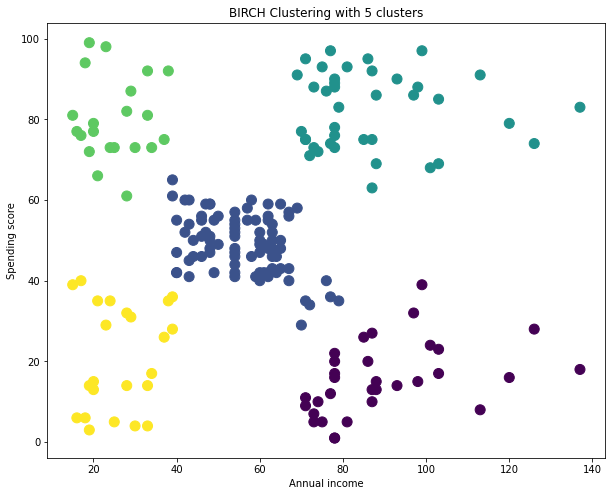

In [15]:
from turtle import color
from matplotlib import pyplot as plt


plt.figure(figsize=(10, 8))
plt.scatter(X["Annual Income (k$)"],
            X["Spending Score (1-100)"],
            c=birch.labels_,
            s=100)

# plt.scatter(centers[:,0], centers[:,1], color="blue", s=200)

plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.title("BIRCH Clustering with 5 clusters")
plt.show()

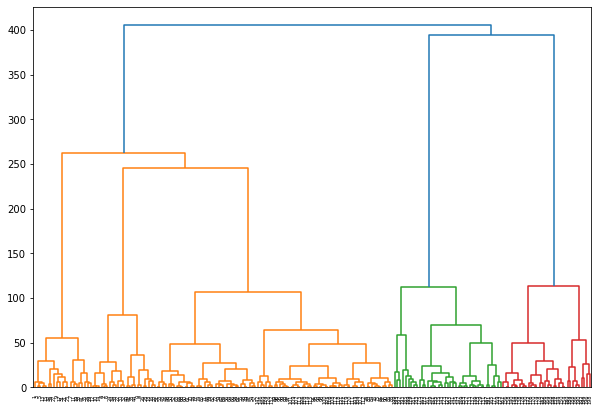

In [16]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(X, method="ward"))

In [17]:
from sklearn.cluster import AgglomerativeClustering


agg = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
agg.fit_predict(X)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

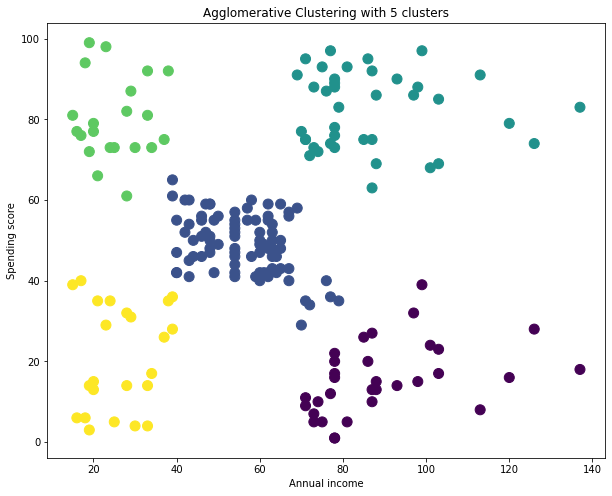

In [18]:
from turtle import color
from matplotlib import pyplot as plt


plt.figure(figsize=(10, 8))
plt.scatter(X["Annual Income (k$)"],
            X["Spending Score (1-100)"],
            c=agg.labels_,
            s=100)

# plt.scatter(centers[:,0], centers[:,1], color="blue", s=200)

plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.title("Agglomerative Clustering with 5 clusters")
plt.show()

## DBScan

In [19]:
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=0.7, min_samples=3)

yhat = dbscan.fit(X)

In [20]:
set(yhat.labels_)

{-1}

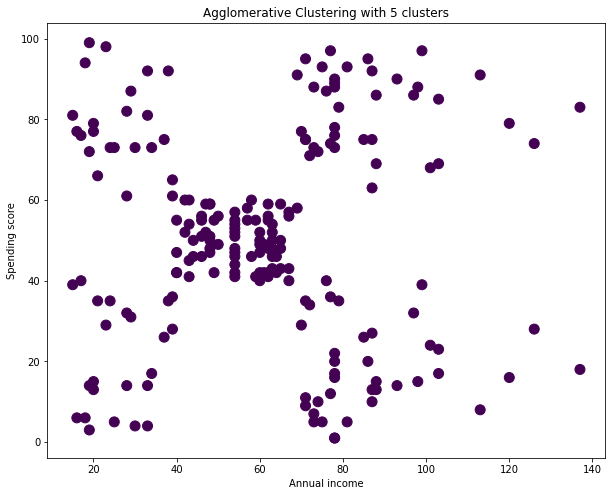

In [21]:
from turtle import color
from matplotlib import pyplot as plt


plt.figure(figsize=(10, 8))
plt.scatter(X["Annual Income (k$)"],
            X["Spending Score (1-100)"],
            c=yhat.labels_,
            s=100)

# plt.scatter(centers[:,0], centers[:,1], color="blue", s=200)

plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.title("Agglomerative Clustering with 5 clusters")
plt.show()

## CLIQUE

In [22]:
# pip install pyclustering

Note: you may need to restart the kernel to use updated packages.


In [41]:
from pyclustering.cluster.clique import clique, clique_visualizer

# create CLIQUE algorithm for processing
intervals = 10  # defines amount of cells in grid in each dimension
threshold = 5   # lets consider each point as non-outlier
clique_instance = clique(X, intervals, threshold)

# start clustering process and obtain results
# clique_instance.process()
clusters = clique_instance.get_clusters()  # allocated clusters
noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid
print("Amount of clusters:", len(clusters))
# print(cells)
# # visualize clustering results
# clique_visualizer.show_grid(cells, X)    # show grid that has been formed by the algorithm
clique_visualizer.show_clusters(X, clusters, noise)  # show clustering results

Amount of clusters: 0


<Figure size 432x288 with 0 Axes>